In [3]:
# From https://github.com/py-why/dowhy/blob/main/docs/source/example_notebooks/dowhy_causal_discovery_example.ipynb

from dowhy import CausalModel

import numpy as np
import pandas as pd
import graphviz
import networkx as nx 


from causallearn.search.ConstraintBased.PC import pc
from causallearn.search.ScoreBased.GES import ges
from causallearn.search.FCMBased import lingam

from causallearn.search.FCMBased.lingam.utils import make_dot

# Visualization using pydot
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import io

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

In [4]:
#Treat dataset

#Import data 
# data = pd.read_csv('../datasets/consolidated.csv',header=0, index_col=0)
data = pd.read_csv('./GenerateDatasets/consolidated.csv',header=0, index_col=0)
consolidated = pd.DataFrame(data)

consolidated = consolidated.drop(columns=['experiment'])#, 'messageDuplicated'])#, 'n_nodes', 'consensus', 'messageDuplicated'])
consolidated = consolidated.rename(columns={'topology':'top'})
consolidated['topology'] = 0
consolidated.loc[consolidated['top'] == 'general', 'topology'] = 1
consolidated = consolidated.drop(columns=['top'])
# consolidated.head(100)

df = consolidated[['d', 'messageReceived', 'graft', 'prune', 'iwant', 'dlo', 'dhi', 'dscore', 'dlazy', 'ihave', 'dout', 'gossipFactor', 
                  'interval', 'topology', 'propagationTime', 'messageOverhead', 'messageBandwidth', 'totalBandwidth', 'gossipBandwidth']]#.to_numpy()

# X = consolidated.to_numpy()
print(df)

        d  messageReceived  graft  prune  iwant  dlo  dhi  dscore  dlazy  \
0       8           8684.0    0.0    0.0    0.0    6   12       4      8   
1       8          16138.0    0.0    0.0    0.0    6   12       4      8   
2       8          13689.0    0.0    0.0    0.0    6   12       4      8   
3       8          13750.0    0.0    0.0    0.0    6   12       4      8   
4       8          13993.0    0.0    0.0    2.0    6   12       4      8   
...    ..              ...    ...    ...    ...  ...  ...     ...    ...   
33816  21              0.0    0.0    0.0    0.0   16   24       5     16   
33817  21              0.0    0.0    0.0    0.0   16   24       5     16   
33818  21              0.0    0.0    0.0    0.0   16   24       5     16   
33819  21              0.0    0.0    0.0    0.0   16   24       5     16   
33820  21              0.0    0.0    0.0    0.0   16   24       5     16   

        ihave  dout  gossipFactor  interval  topology  propagationTime  \
0       698.0

In [5]:
labels = [f'{col}' for i, col in enumerate(df.columns)]
data = df.to_numpy()

  0%|          | 0/19 [00:00<?, ?it/s]

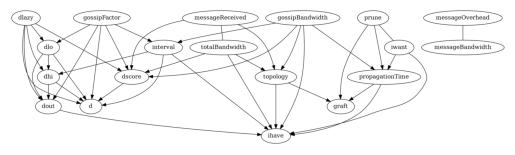

In [6]:
#PC

cg = pc(data)

pyd = GraphUtils.to_pydot(cg.G, labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

In [7]:
# GES

Record = ges(data)

pyd = GraphUtils.to_pydot(Record['G'], labels=labels)
tmp_png = pyd.create_png(f="png")
fp = io.BytesIO(tmp_png)
img = mpimg.imread(fp, format='png')
plt.axis('off')
plt.imshow(img)
plt.show()

/home/flav/anaconda3/lib/python3.7/site-packages/causallearn/score/LocalScoreFunction.py:73: RuntimeWarning: invalid value encountered in log
  H = np.log(cov[i, i] - yX * np.linalg.inv(XX) * yX.T)
/home/flav/anaconda3/lib/python3.7/site-packages/causallearn/score/LocalScoreFunction.py:73: RuntimeWarning: divide by zero encountered in log
  H = np.log(cov[i, i] - yX * np.linalg.inv(XX) * yX.T)
/home/flav/anaconda3/lib/python3.7/site-packages/causallearn/search/ScoreBased/GES.py:181: RuntimeWarning: invalid value encountered in subtract
  if (score - score_new <= 0):


KeyboardInterrupt: 

In [ ]:
# Lingam
model = lingam.ICALiNGAM()
model.fit(data)

make_dot(model.adjacency_matrix_, labels=labels)